In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

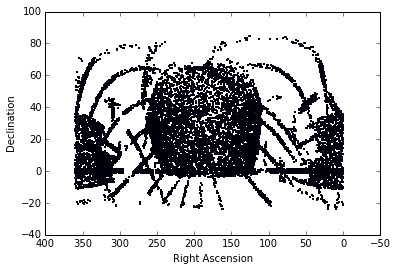

In [5]:
allsky = np.genfromtxt('allsky_sample.csv', delimiter=",", dtype = [('run','int'),('rerun','int'),('camcol','int'),('field','int'),('obj','int'),('type','int'),('ra','float'),('dec','float'),('psfMag_r','float'),('psfMag_g','float'),('psfMagErr_r','float'),('psfMagErr_g','float')])
plt.scatter(allsky['ra'],allsky['dec'],s=1)
plt.gca().invert_xaxis()
plt.xlabel('Right Ascension')
plt.ylabel('Declination')

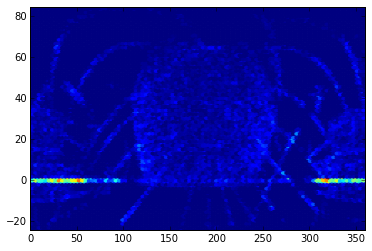

In [6]:
plt.hexbin(allsky['ra'],allsky['dec'],cmap='jet',gridsize=100)

In [7]:
def equgal(ra,dec):
    b = np.arcsin(np.sin(dec)*np.cos(62.6)-np.cos(dec)*np.sin(ra-282.25)*np.sin(62.6))
    l = np.arcsin((np.cos(dec)*np.cos(ra-282.25))/(np.cos(b))) + 33.0
    return (b,l)


In [8]:
b, l = equgal((np.pi/180.0)*allsky['ra'],(np.pi/180.0)*allsky['dec'])

In [9]:
print b

[ 0.59205243  0.59205754  0.59201958 ...,  0.30337362  0.30254897
  0.3038435 ]


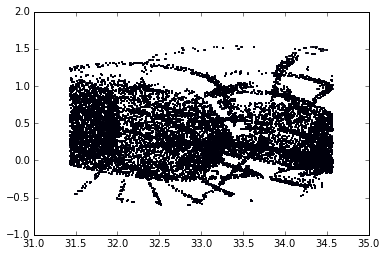

In [10]:
plt.scatter(l,b, s=1)

In [11]:
sort = np.argsort(b) < 5

In [12]:
print b[sort]

[ 0.22100596 -0.06247606  0.6890922   0.68905822  0.3906922 ]


In [13]:
print allsky['ra'][sort],allsky['dec'][sort]

[ 205.71807542  319.71733506  359.62873696  359.62328813  235.9331674 ] [ 23.5934693   -0.85967342  34.19070632  34.18991759  35.60995674]


In [14]:
def gc_dist(lon1,lat1,lon2,lat2):
    sig = np.arccos(np.sin((np.pi/180.0)*lat1) * np.sin((np.pi/180.0)*lat2) + np.cos((np.pi/180.0)*lat1) * np.cos((np.pi/180.0)*lat2) * np.cos((np.pi/180.0) * (np.absolute(lat2 - lat1))))
    sig_deg = sig * (180.0 / np.pi)
    return sig_deg

In [15]:
sdss = np.genfromtxt('small_sdss.csv',usecols=(0,1,2,3),delimiter=",",dtype = [('ra','float'),('dec','float'),('psfMag_r','float'),('psfMag_g','float')])

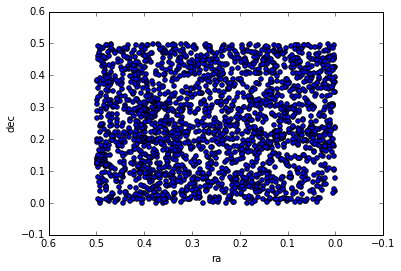

In [17]:
plt.scatter(sdss['ra'],sdss['dec'])
plt.gca().invert_xaxis()
plt.xlabel('ra')
plt.ylabel('dec')


In [37]:
sdss = np.genfromtxt('small_sdss.csv',delimiter=",",usecols=(0,1),dtype=[('ra','float'),('dec','float')])

In [20]:
s = np.matrix(zip(sdss['ra'],sdss['dec']))

In [21]:
print s

[[ 0.015303    0.49791012]
 [ 0.01552545  0.47636993]
 [ 0.01560442  0.36733674]
 ..., 
 [ 0.49861108  0.26567809]
 [ 0.49872082  0.30973605]
 [ 0.49892195  0.12448128]]


In [22]:
a = np.triu_indices(2319)

In [23]:
s[a[1]]

matrix([[ 0.015303  ,  0.49791012],
        [ 0.01552545,  0.47636993],
        [ 0.01560442,  0.36733674],
        ..., 
        [ 0.49861108,  0.26567809],
        [ 0.49872082,  0.30973605],
        [ 0.49872082,  0.30973605]])

In [24]:
s[a[0]]

matrix([[ 0.015303  ,  0.49791012],
        [ 0.015303  ,  0.49791012],
        [ 0.015303  ,  0.49791012],
        ..., 
        [ 0.49861108,  0.26567809],
        [ 0.49861108,  0.26567809],
        [ 0.49872082,  0.30973605]])

In [25]:
long1 = np.array(s[a[0]][:,0])

In [26]:
lat1 = np.array(s[a[0]][:,1])

In [27]:
long2 = np.array(s[a[1]][:,0])

In [28]:
lat2 = np.array(s[a[1]][:,1])

In [29]:
sig = gc_dist(long1,lat1,long2,lat2)

/Users/shankj3/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in arccos
  from IPython.kernel.zmq import kernelapp as app


In [30]:
print len(sig)

2690040


In [31]:
plt.his(sig)

AttributeError: 'module' object has no attribute 'his'

In [32]:
sig = sig[np.logical_not(np.isnan(sig))]


(array([  9.82900000e+03,   5.53900000e+03,   5.52400000e+03,
          5.22900000e+03,   5.27300000e+03,   5.36300000e+03,
          5.38500000e+03,   5.39600000e+03,   5.47800000e+03,
          5.22500000e+03,   5.11800000e+03,   5.07200000e+03,
          5.32000000e+03,   5.14200000e+03,   5.35300000e+03,
          5.24500000e+03,   5.52200000e+03,   5.47600000e+03,
          5.06100000e+03,   5.39100000e+03,   5.22900000e+03,
          5.23200000e+03,   5.33500000e+03,   5.35600000e+03,
          5.50300000e+03,   5.38200000e+03,   5.20200000e+03,
          5.08400000e+03,   5.41700000e+03,   5.26100000e+03,
          5.24200000e+03,   5.42900000e+03,   5.10600000e+03,
          5.28500000e+03,   5.09100000e+03,   5.18300000e+03,
          5.07800000e+03,   5.29500000e+03,   5.05900000e+03,
          4.91500000e+03,   5.04600000e+03,   5.22400000e+03,
          5.16500000e+03,   4.96900000e+03,   5.40200000e+03,
          5.01600000e+03,   5.09500000e+03,   4.92400000e+03,
        

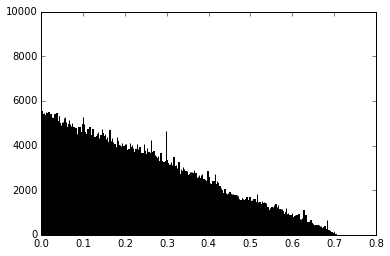

In [34]:
plt.hist(sig,bins = 1000)